In [1]:
from typing import final

import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import requests
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import warnings
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
import CONSTANTS
from functions import *
warnings.filterwarnings('ignore')

# Train models on the data

In [2]:
COIN = 'BTC'
data = pd.read_csv(fullDataPath(COIN))
data.set_index('time', inplace=True)
data

,low,high,open,close,volume,change,pct_change,SMA_20,SMA_50,EMA_20,...,score_coin,Unnamed: 0_filtered,Username,Text,Created_at,Tweet_ID,coin,sentiment_tweet_roberta,score_filtered,date_filtered
time,,,,,,,,,,,,,,,,,,,,,
2024-04-18,60816.07,64210.00,61275.73,63513.85,15249.842114,2238.12,3.652539,63384.6340,65477.6480,64040.801175,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-19,59573.32,65498.99,63514.84,63848.37,22838.079342,333.53,0.525121,63267.4180,65593.8616,64096.269720,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-20,63121.15,65463.08,63841.96,64968.87,5157.407265,1126.91,1.765156,63228.6780,65702.9752,64122.364427,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-21,64250.00,65725.81,64960.82,64952.92,4487.487232,-7.90,-0.012161,63019.6080,65796.3552,64033.258577,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-22,64520.00,67272.73,64952.92,66859.17,10977.051786,1906.25,2.934818,62812.6935,65887.2514,63936.452112,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate gradient of the closing price

In [33]:
data['gradient'] = data['close'].diff()
data.sort_index(inplace=True)

<Axes: xlabel='time'>

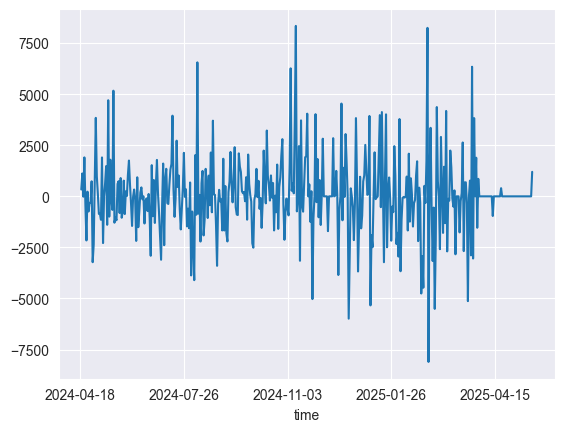

In [34]:
data['gradient'].plot.line()

In [35]:
data['TextType'] = data['link'].apply(lambda x: 'tweet' if x == CONSTANTS.EMPTY_STRING else 'newspaper')

In [36]:
data

,low,high,open,close,volume,change,pct_change,SMA_20,SMA_50,EMA_20,...,Username,Text,Created_at,Tweet_ID,coin,sentiment_tweet_roberta,score_filtered,date_filtered,gradient,TextType
time,,,,,,,,,,,,,,,,,,,,,
2024-04-18,60816.07,64210.00,61275.73,63513.85,15249.842114,2238.12,3.652539,63384.6340,65477.6480,64040.801175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tweet
2024-04-19,59573.32,65498.99,63514.84,63848.37,22838.079342,333.53,0.525121,63267.4180,65593.8616,64096.269720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.52,tweet
2024-04-20,63121.15,65463.08,63841.96,64968.87,5157.407265,1126.91,1.765156,63228.6780,65702.9752,64122.364427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120.50,newspaper
2024-04-21,64250.00,65725.81,64960.82,64952.92,4487.487232,-7.90,-0.012161,63019.6080,65796.3552,64033.258577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.95,tweet
2024-04-22,64520.00,67272.73,64952.92,66859.17,10977.051786,1906.25,2.934818,62812.6935,65887.2514,63936.452112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906.25,tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,newspaper
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,newspaper
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,newspaper


In [38]:
data

,low,high,open,close,volume,change,pct_change,SMA_20,SMA_50,EMA_20,...,Username,Text,Created_at,Tweet_ID,coin,sentiment_tweet_roberta,score_filtered,date_filtered,gradient,TextType
time,,,,,,,,,,,,,,,,,,,,,
2024-04-18,60816.07,64210.00,61275.73,63513.85,15249.842114,2238.12,3.652539,63384.6340,65477.6480,64040.801175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tweet
2024-04-19,59573.32,65498.99,63514.84,63848.37,22838.079342,333.53,0.525121,63267.4180,65593.8616,64096.269720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.52,tweet
2024-04-20,63121.15,65463.08,63841.96,64968.87,5157.407265,1126.91,1.765156,63228.6780,65702.9752,64122.364427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120.50,newspaper
2024-04-21,64250.00,65725.81,64960.82,64952.92,4487.487232,-7.90,-0.012161,63019.6080,65796.3552,64033.258577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.95,tweet
2024-04-22,64520.00,67272.73,64952.92,66859.17,10977.051786,1906.25,2.934818,62812.6935,65887.2514,63936.452112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906.25,tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,newspaper
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,newspaper
2025-04-16,83088.02,85526.40,83622.52,84028.72,8243.059013,406.20,0.485754,65573.5735,66024.8888,67770.072844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,newspaper


## Traditional Models

1. Decision Tree
2. Random Forest
3. Linear Regression
4. LASSO
5. Ridge Regression

In [109]:
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import *
from sklearn.pipeline import make_pipeline

Cross Validation

In [110]:
def cv_metrics(model, data, yCol='gradient', v=5, trainingColsPath='training_columns.txt'):
    pipeline = make_pipeline(StandardScaler(), model)
    trainingCols = open(trainingColsPath, 'r').readlines()
    trainingCols = [i.strip() for i in trainingCols]
    assert yCol not in trainingCols, f'{yCol} should not be in trainingCols but was found in it'
    myFillNa(data)
    X = pd.get_dummies(data[trainingCols])
    y = data[yCol]
    cv_scores = -cross_val_score(pipeline, X, y, cv=10, scoring='neg_root_mean_squared_error')
    cv_scores = pd.Series(cv_scores)
    cv_scores.index += 1
    cv_scores.plot.bar()
    print(f'CV RMSE: {cv_scores.mean()}')
    return cv_scores

CV RMSE: 2063.9946934129266


1     1656.512042
2     1773.586006
3     2279.743764
4     1336.839516
5     2335.284995
6     3193.495340
7     2388.041459
8     3121.658487
9     2311.469152
10     243.316173
dtype: float64

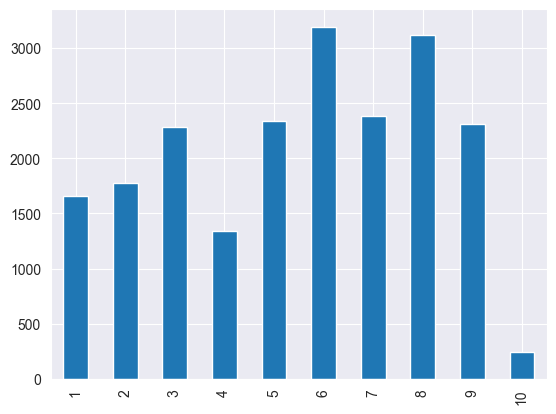

In [111]:
model = DecisionTreeRegressor(max_depth=5)
cv_metrics(model, data)

CV RMSE: 2034.8618100087704


1     1716.148463
2     1556.653437
3     2206.472255
4     1469.449393
5     2440.796045
6     2979.580178
7     2258.052269
8     2994.044421
9     2315.848981
10     411.572659
dtype: float64

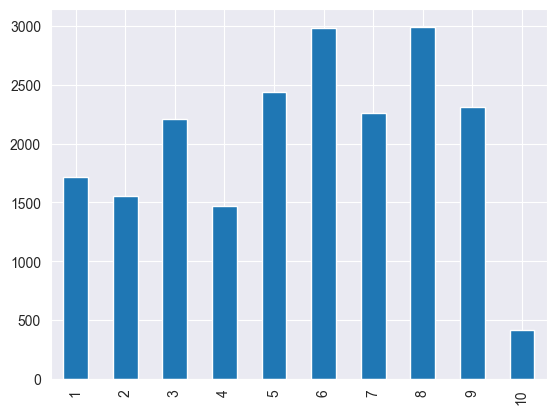

In [112]:
rf = RandomForestRegressor(n_estimators=50, max_depth=50)
cv_metrics(rf, data)

CV RMSE: 1841.9825048629482


1     1721.407728
2     1225.434495
3     1979.036021
4     1324.679881
5     2400.879098
6     2439.113381
7     2238.811169
8     2829.832410
9     1981.137463
10     279.493403
dtype: float64

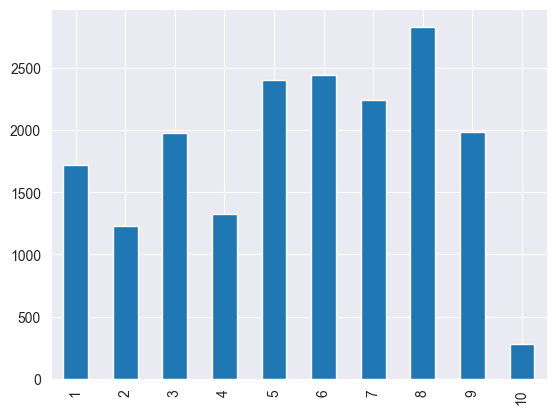

In [113]:
cv_metrics(LinearRegression(), data)

In [127]:
from sklearn.model_selection import GridSearchCV

def hyperparameterTuning(model, tuningDict, yCol='gradient', trainingColsPath='training_columns.txt', v=5):
    trainingCols = open(trainingColsPath, 'r').readlines()
    trainingCols = [i.strip() for i in trainingCols]
    assert yCol not in trainingCols, f'{yCol} should not be in trainingCols but was found in it'
    myFillNa(data)
    X = pd.get_dummies(data[trainingCols])
    y = data[yCol]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search = GridSearchCV(model, tuningDict, cv=v, scoring='neg_root_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, -grid_search.best_score_

In [128]:
tuningDict = {
    'max_depth': np.arange(3, 10, 1),
    'min_samples_split': np.arange(2, 4, 1),
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}
best_params, best_score = hyperparameterTuning(DecisionTreeRegressor(), tuningDict, v=10)
print(f'Best params: {best_params}')
print(f'Best score: {best_score}')

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Best params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3}
Best score: 1825.7626520951949


In [129]:
tuningDict = {
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(10, 100, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}
best_params, best_score = hyperparameterTuning(RandomForestRegressor(), tuningDict, v=10)
print(f'Best params: {best_params}')
print(f'Best score: {best_score}')

Fitting 10 folds for each of 189 candidates, totalling 1890 fits
Best params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 30}
Best score: 1825.0997047971537


In [133]:
tuningDict = {
    'alpha': np.arange(0, 50, 1)
}
best_params, best_score = hyperparameterTuning(Lasso(), tuningDict, v=10)
print(f'Best params: {best_params}')
print(f'Best score: {best_score}')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best params: {'alpha': 49}
Best score: 1831.2822425279542


In [134]:
tuningDict = {
    'alpha': np.arange(0, 195, 1)
}
best_params, best_score = hyperparameterTuning(Ridge(), tuningDict, v=10)
print(f'Best params: {best_params}')
print(f'Best score: {best_score}')

Fitting 10 folds for each of 195 candidates, totalling 1950 fits
Best params: {'alpha': 194}
Best score: 1835.313357252279


So far, the decision tree with {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3} is the best

## Fit on decision tree

In [135]:
trainingCols = open('training_columns.txt', 'r').readlines()
trainingCols = [i.strip() for i in trainingCols]
myFillNa(data)
X = pd.get_dummies(data[trainingCols])
y = data['gradient']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
finalModel = DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=4, min_samples_split=3)
finalModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3)

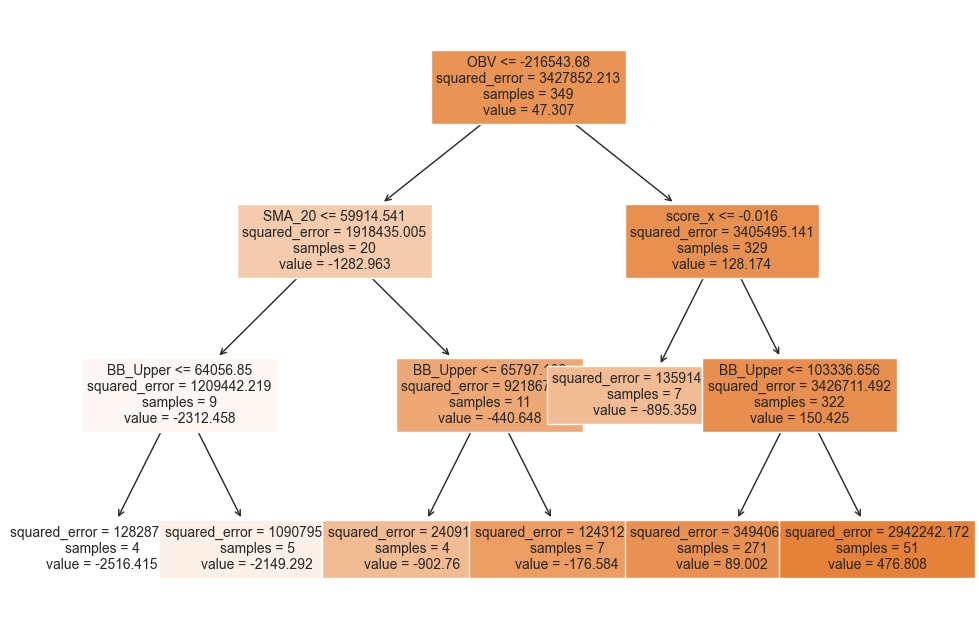

In [138]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `finalModel` is your trained DecisionTreeRegressor and `X` contains the feature names
plt.figure(figsize=(12, 8))
plot_tree(finalModel, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

<Axes: xlabel='time'>

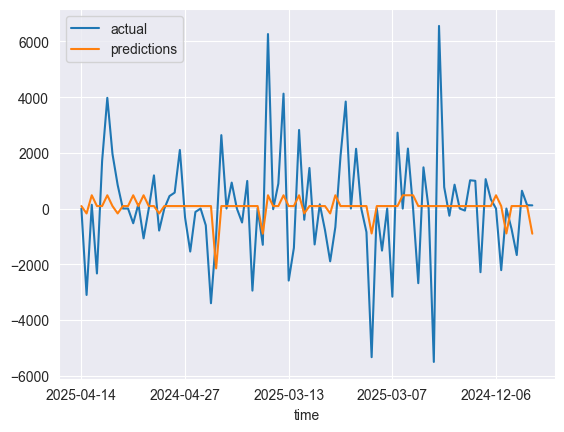

In [145]:
dtPredictions = finalModel.predict(X_test)
pd.DataFrame({
    'actual': y_test,
    'predictions': dtPredictions
}).plot.line()

In [146]:
root_mean_squared_error(y_test, dtPredictions)

1902.7517840118278